Mean Squared Error: 751.4911389881388
R-squared: 0.4962830808077713
Mean Absolute Error: 19.46873078071354
Average Cross-Validation MSE: 1398.0092349437032


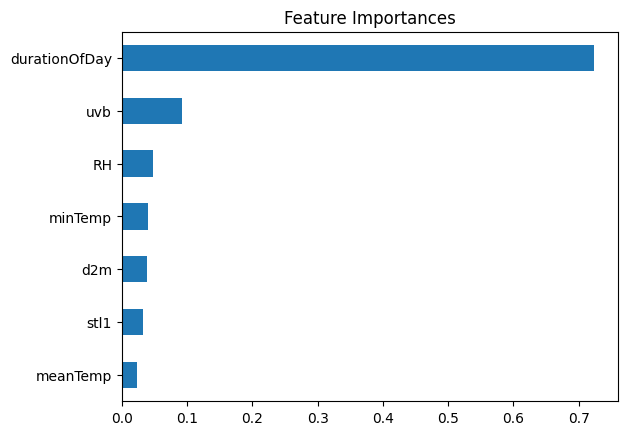

Residual Sum of Squares (RSS): 43586.48606131204


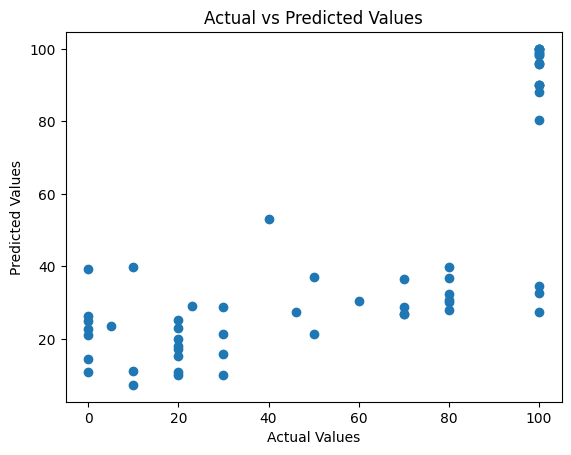

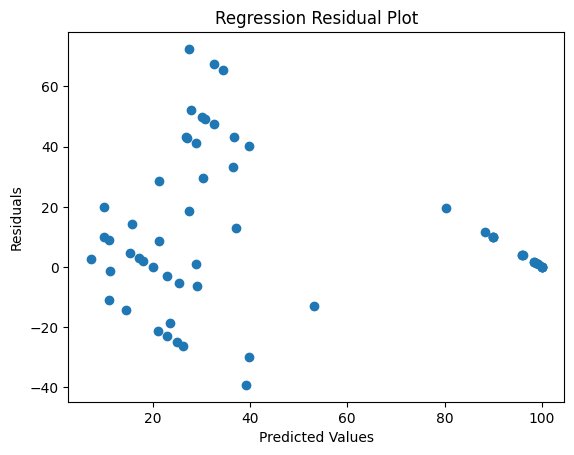

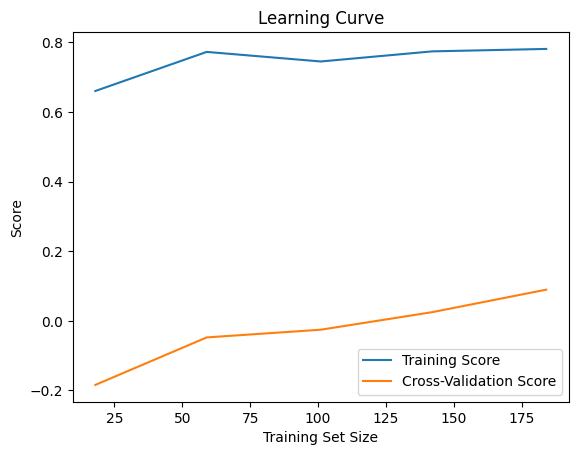

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_excel('mun-test.xlsx')

# Drop unnecessary columns
df.drop(['date', 'sunrise', 'sunset','latitude','longitude','e','sp','tp','maxTemp','WS','age'], axis=1, inplace=True)

# Split data into features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Train the model with the best parameters
best_rf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

# Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
avg_mse_cv = -np.mean(cv_scores)
print("Average Cross-Validation MSE:", avg_mse_cv)

# Feature importances plot
model_ranks = pd.Series(best_rf.feature_importances_, index=x_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()

# Residual Sum of Squares (RSS)
residuals = y_test - y_pred
rss = sum(residuals**2)
print("Residual Sum of Squares (RSS):", rss)

# Visualization of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# # Additional Metrics for Classification Problems
# # Assuming binary classification (you may need to adjust for multi-class)
# threshold = 0.5  # Adjust threshold as needed
# y_pred_binary = (y_pred > threshold)
# y_test_binary = (y_test > threshold)

# # Confusion Matrix
# cm = confusion_matrix(y_test_binary, y_pred_binary)
# print("Confusion Matrix:")
# print(cm)

# # Precision, Recall, F1-score
# precision = precision_score(y_test_binary, y_pred_binary)
# recall = recall_score(y_test_binary, y_pred_binary)
# f1 = f1_score(y_test_binary, y_pred_binary)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# Regression Residual Plot
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Regression Residual Plot")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

print("Best Hyperparameters:", best_params)
